In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


## Reading and analysing the data

In [4]:
credit_card_data = pd.read_csv('card_transdata.csv', na_values=['NA'])
credit_card_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
credit_card_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Frequency')

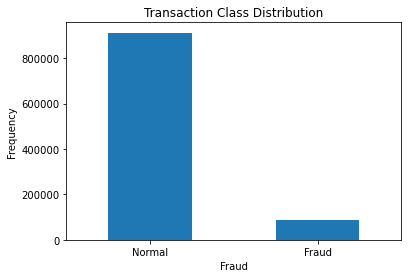

In [6]:
count_frauds = pd.value_counts(credit_card_data['fraud'], sort = True)

count_frauds.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

LABELS = ["Normal", "Fraud"]

plt.xticks(range(2), LABELS)

plt.xlabel("Fraud")

plt.ylabel("Frequency")

In [7]:
fraud = credit_card_data[credit_card_data['fraud']==1]

normal = credit_card_data[credit_card_data['fraud']==0]

print(normal.shape, fraud.shape)

(912597, 8) (87403, 8)


In [8]:
fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


In [9]:
normal.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.0
mean,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225,0.0
std,52.828655,22.472359,1.946152,0.322997,0.479825,0.312821,0.484831,0.0
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.828942,0.293859,0.449768,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.673847,0.985074,0.913950,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.158057,3.268578,1.788918,1.000000,1.000000,0.000000,1.000000,0.0
max,8777.136420,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


### Create smaller dataset

In [10]:
training_data = credit_card_data.sample(frac = 0.1,random_state=1)

training_data.shape

(100000, 8)

In [11]:
fraud = training_data[training_data['fraud']==1]

valid = training_data[training_data['fraud']==0]

outlier_fraction = len(fraud)/float(len(valid))

print(outlier_fraction)

print("Fraud Cases : {}".format(len(fraud)))

print("Valid Cases : {}".format(len(valid)))

0.09674376775353974
Fraud Cases : 8821
Valid Cases : 91179


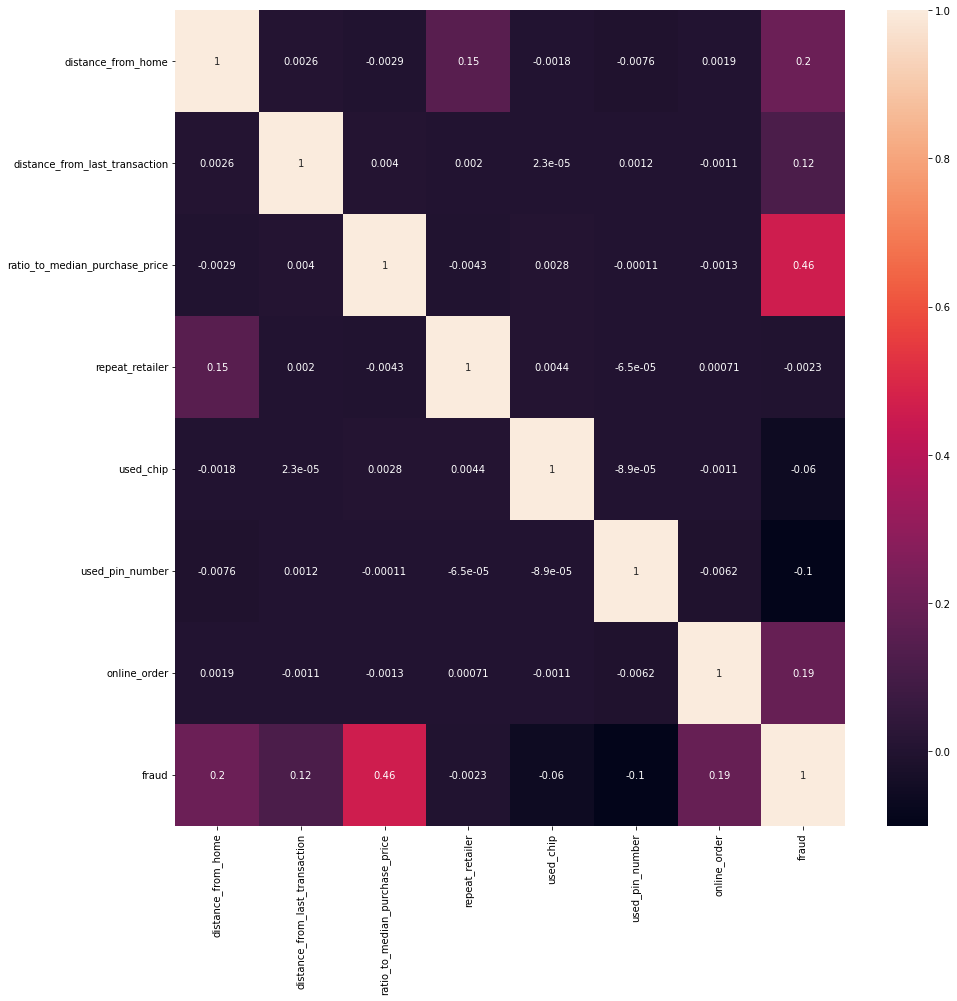

In [12]:
correlation_matrix = training_data.corr()

top_corr_features = correlation_matrix.index

plt.figure(figsize=(15,15))
#plot heat map
g=sb.heatmap(training_data[top_corr_features].corr(),annot=True)



## Preparing the data

In [13]:
columns = list(training_data.columns.values)

# filter the columns (remove the labels)
columns = [c for c in columns if c not in ["fraud"]]

X = credit_card_data[columns]

Y = credit_card_data["fraud"]

print(X.shape, Y.shape)

(1000000, 7) (1000000,)


In [14]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X, Y, test_size=0.25, random_state=1)

Under sample

In [15]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)

new_fraud = y_res[y_res==1]

new_valid = y_res[y_res==0]

old_fraud = y_train[y_train==1]

old_valid = y_train[y_train==0]

print("New number of fraud cases is" , new_fraud.shape, "and number of valid cases is", new_valid.shape)
print("Old number of fraud cases is" , old_fraud.shape, "and number of valid cases is", old_valid.shape)



New number of fraud cases is (65480,) and number of valid cases is (65480,)
Old number of fraud cases is (65480,) and number of valid cases is (684520,)


## Training models 
We will use the follwing:
- Decision Tree
- Neural Networks
- K-NN

### Decision Tree

#### Balanced Dataset

In [16]:
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_res, y_res)

y_pred = decision_tree_classifier.predict(X_test)


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))



Confusion matrix:
 [[228061     16]
 [     4  21919]]
F1: 0.9995439828537553
Accuracy: 0.99992


#### Inbalanced Dataset

In [18]:
decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)

In [19]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[228076      1]
 [     4  21919]]
F1: 0.9998859567091668
Accuracy: 0.99998


#### imprimir f1, accuray e ?

### Neural Networks

#### Balanced Dataset

In [20]:
#mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=100)
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2), activation='relu', solver='adam', max_iter=100)

mlp.fit(X_res,y_res)

#predict_train = mlp.predict(X)

y_pred = mlp.predict(X_test)

#mlp.score(X_test, y_test)

/home/frederico/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

#### Inbalanced Dataset

In [21]:
mlp.fit(X_train,y_train)

#predict_train = mlp.predict(X)

y_pred = mlp.predict(X_test)

In [22]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[222910   5167]
 [  2845  19078]]
F1: 0.8264598856350719
Accuracy: 0.967952


## K-NN

#### Balanced Dataset

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_res, y_res)

y_pred = knn.predict(X_test)

In [24]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[215256  12821]
 [   103  21820]]
F1: 0.7715154515239376
Accuracy: 0.948304


#### Imbalanced Dataset

In [25]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [26]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[225717   2360]
 [  1473  20450]]
F1: 0.914313817539624
Accuracy: 0.984668
